# Same project as Wrangling and Visualizing Musical Data, but with Python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("bb_chords.csv")

In [ ]:
data.head()

,year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist
0,1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1,1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
2,1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
3,1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
4,1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown


In [ ]:
# Chords per song for every artist
chords_per_song = data.groupby(["artist", "title", "chord"], as_index = False).title_compressed.count()
chords_per_song = chords_per_song.groupby(["artist", "title"], as_index = False).chord.count()
chords_per_song.head()

,artist,title,chord
0,A Taste Of Honey,Sukiyaki,8
1,Abba,Chiquitita,7
2,Abba,Fernando,5
3,Abba,"Knowing Me, Knowing You",10
4,Abba,On And On And On,8


In [ ]:
# A look at 4 different songs by 4 different artists
chords_per_song[chords_per_song["artist"].isin(["Metallica", "Judas Priest", "Queen", "The Cure"])]

,artist,title,chord
330,Judas Priest,You've Got Another Thing Comin',11
375,Metallica,One,14
425,Queen,We Are The Champions,16
530,The Cure,Just Like Heaven,8


In [ ]:
# Get 20 most popular chords
most_popular_chords = pd.DataFrame(data.chord.value_counts().head(20))

In [ ]:
# Parameters for visualization with Seaborn
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_context("notebook")
sns.set_style("whitegrid")

[Text(0.5, 1.0, 'MOST COMMON CHORDS'),
 Text(0.5, 0, 'Chord counts'),
 Text(0, 0.5, 'Chords')]

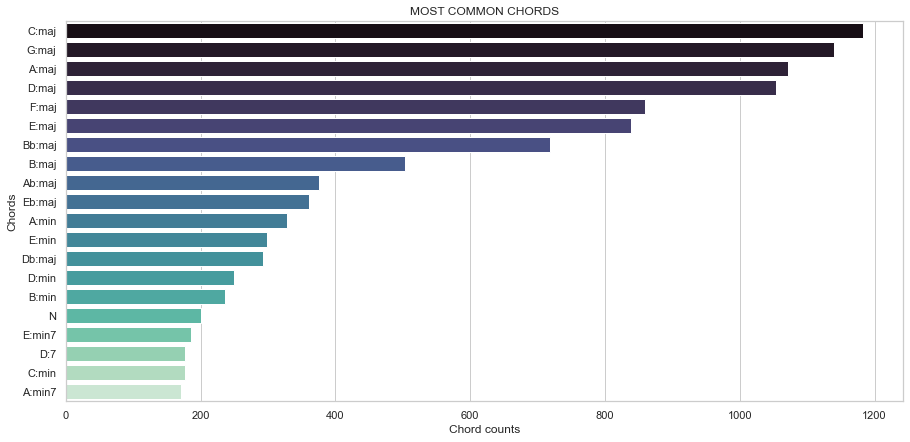

In [ ]:
# Plot 20 most common chords
sns.barplot(y=most_popular_chords.index, x=most_popular_chords.chord, palette="mako").set(
    												   title = "MOST COMMON CHORDS",
                                                       xlabel = "Chord counts",
                                                       ylabel = "Chords")

In [ ]:
# Find most popular artists
artist_title_unique =data[["artist", "title"]].drop_duplicates()
artist_title_unique.groupby("artist").title.count().sort_values(ascending=False).head(20)

artist
Elvis Presley         13
Brenda Lee             9
Dion                   8
Bob Seger              7
The Beatles            7
James Brown            7
Kenny Rogers           7
The Beach Boys         6
Dr. Hook               6
John Denver            6
Chicago                6
Johnny Tillotson       6
Eric Clapton           6
Abba                   5
Billy Idol             5
Glen Campbell          5
Cliff Richard          5
The Rolling Stones     5
Stevie Wonder          4
Pat Benatar            4
Name: title, dtype: int64

In [ ]:
# Create bigrams
data["next_chord"] = data.chord.shift(-1)
data["next_title"] = data.title.shift(-1)
data["bigram"] = data["chord"] + " " + data["next_chord"]

In [ ]:
# Get 20 most popular bigrams
bigram_counts = data[data["title"] == data["next_title"]].groupby("bigram").bigram.count().sort_values(ascending=False).head(20)

most_popular_bigrams = pd.DataFrame(bigram_counts)

[Text(0.5, 1.0, 'MOST POPULAR BIGRAMS'),
 Text(0.5, 0, 'Bigram counts'),
 Text(0, 0.5, 'Bigram')]

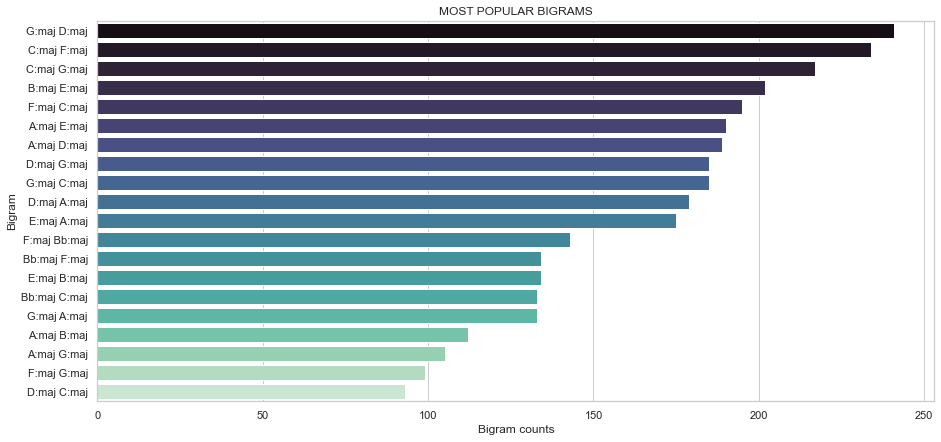

In [ ]:
# Plot 20 most common bigrams
sns.barplot( x=most_popular_bigrams.bigram,y=most_popular_bigrams.index, palette="mako").set(
																			title = "MOST POPULAR BIGRAMS",
																			xlabel = "Bigram counts",
																			ylabel = "Bigram")

In [ ]:
# Create a DF of 8 artists with their main instrument
main_instrument= pd.DataFrame({
  "artist" : ['Abba', 'Billy Joel', 'Elton John', 'Stevie Wonder', 'The Rolling Stones', 'The Beatles', 'Eric Clapton'],
  "instrument" : ['piano', 'piano', 'piano', 'piano', 'guitar', 'guitar', 'guitar']})

In [ ]:
# Merge the DF main_instrument with the DF data
tagged = data.merge(main_instrument, on="artist", how="inner")

In [ ]:
# Filter for most popular chords
tagged_filtered_chord = tagged[tagged.chord.isin(most_popular_chords.index)]

# Group by instrument and chord
tagged_grouped_chord = tagged_filtered_chord.groupby(["instrument", "chord"],as_index=False).quality.count()

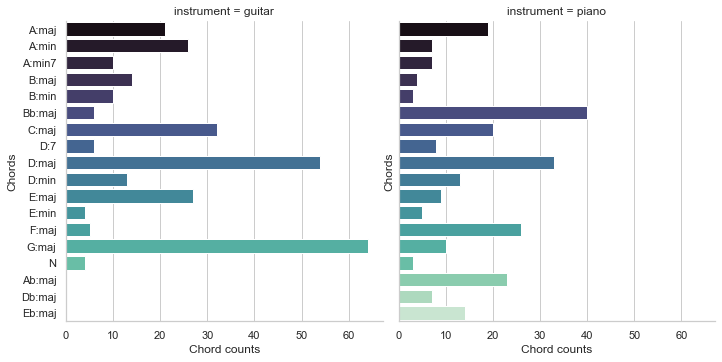

In [ ]:
# Plot the results, splitting the plot by instrument
sns.catplot(y="chord", x="quality", data=tagged_grouped_chord, kind="bar", col="instrument",palette="mako").set(
                                    xlabel = "Chord counts",
                                    ylabel = "Chords")

In [ ]:
# Filter DF tagged for most popular bigrams and title == next title
tagged_filtered_bigram = tagged[(tagged["bigram"].isin(most_popular_bigrams.index)) & (tagged["title"] == tagged["next_title"])]

# Group by instrument and bigrams
tagged_grouped_bigram = tagged_filtered_bigram.groupby(["instrument", "bigram"],as_index=False).quality.count()

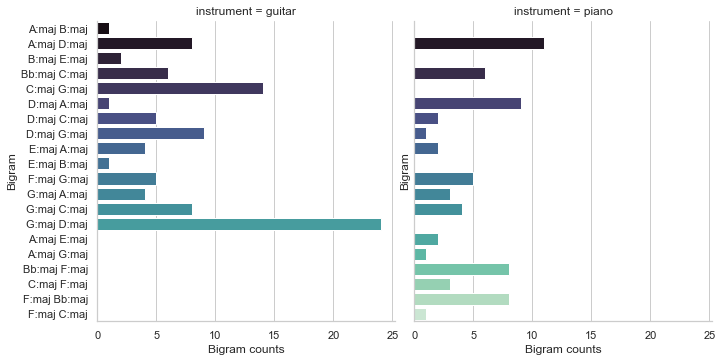

In [ ]:
# Plot the results, splitting the plot by instrument
sns.catplot(y="bigram", x="quality", data=tagged_grouped_bigram, kind="bar", col="instrument",palette="mako").set(
                                    xlabel = "Bigram counts",
                                    ylabel = "Bigram")